# Masked Representation Learning

This notebook demonstrates self-supervised learning using masked representation learning. 
We generate synthetic time-series data, randomly mask portions of the input, train a neural network to reconstruct the masked values, 
and evaluate the reconstruction performance using Mean Squared Error (MSE).

## Imports
We import necessary libraries for data generation, model training, and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(42)

## Generate Clean Sine Wave Data
We generate a smooth sine wave signal without noise to serve as our input sequence.

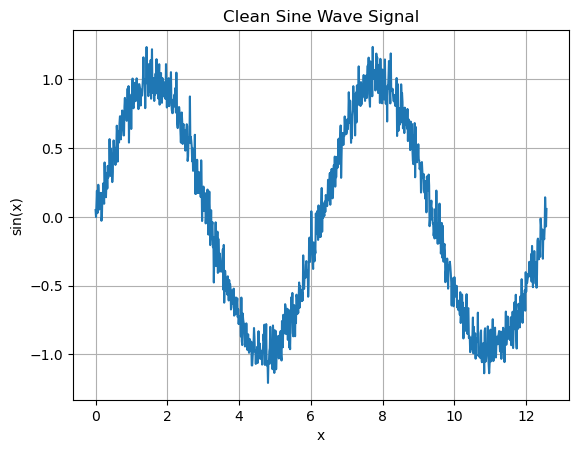

In [2]:
n_points = 1000
x = np.linspace(0, 4 * np.pi, n_points) 
signal = np.sin(x) + 0.1 * np.random.randn(n_points)

# Plot the signal
plt.plot(x, signal)
plt.title('Clean Sine Wave Signal')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

## Create Sliding Windows and Mask One Position
We create overlapping windows of fixed size and randomly mask one position in each window.
The model will be trained to reconstruct the masked value using the remaining context.

In [3]:
window_size = 5
X = []
y = []
mask_indices = []

for i in range(n_points - window_size):
    window = signal[i:i + window_size].copy()
    mask_idx = np.random.randint(window_size)
    target = window[mask_idx]
    window[mask_idx] = 0.0  # Masked value
    X.append(window)
    y.append(target)
    mask_indices.append(mask_idx)

X = np.array(X)
y = np.array(y)

## Train High-Capacity MLP
We train a multi-layer perceptron to predict the masked value from the contextual input.

In [4]:
model = MLPRegressor(hidden_layer_sizes=(128, 128), activation='relu',
                     solver='adam', max_iter=1000, random_state=42)
model.fit(X, y)

# Predict masked values
y_pred = model.predict(X)

# Compute reconstruction error
mse = mean_squared_error(y, y_pred)
print(f'Reconstruction MSE on masked positions: {mse:.4f}')

Reconstruction MSE on masked positions: 0.0124


## Visualize Predictions
We compare the true masked values with the model's predictions to assess reconstruction quality.

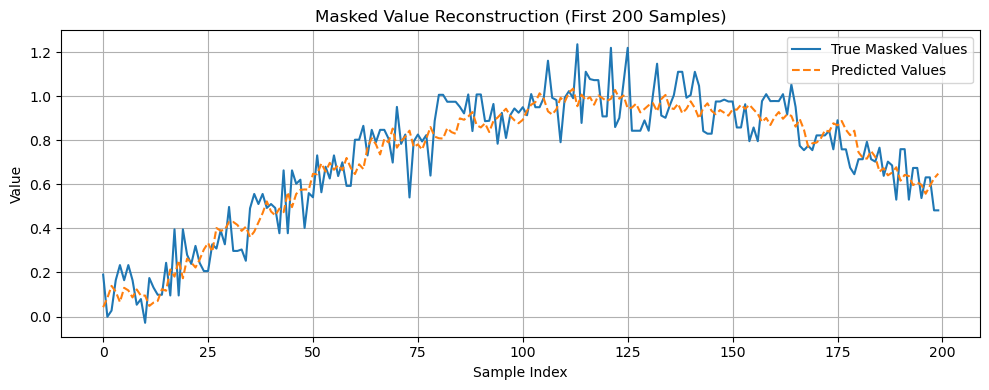

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(y[:200], label='True Masked Values')
plt.plot(y_pred[:200], label='Predicted Values', linestyle='--')
plt.title('Masked Value Reconstruction (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()